In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [15]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

In [16]:
y_train.shape

(60000,)

In [17]:
import matplotlib.pyplot as plt

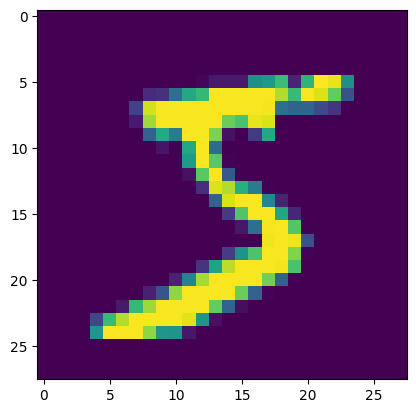

In [18]:
plt.imshow(X_train[0])

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(196, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10 , activation = 'softmax'))

In [24]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'Adam' , metrics = ['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 196)               153860    
                                                                 
 dense_4 (Dense)             (None, 128)               25216     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 180366 (704.55 KB)
Trainable params: 180366 (704.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
history = model.fit(X_train , y_train , epochs = 25 , validation_split = 0.2 , verbose  = 2)

Epoch 1/25
1500/1500 - 4s - loss: 0.0079 - accuracy: 0.9977 - val_loss: 0.1572 - val_accuracy: 0.9785 - 4s/epoch - 3ms/step
Epoch 2/25
1500/1500 - 5s - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.1870 - val_accuracy: 0.9760 - 5s/epoch - 3ms/step
Epoch 3/25
1500/1500 - 6s - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.1599 - val_accuracy: 0.9783 - 6s/epoch - 4ms/step
Epoch 4/25
1500/1500 - 6s - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.1535 - val_accuracy: 0.9803 - 6s/epoch - 4ms/step
Epoch 5/25
1500/1500 - 7s - loss: 0.0111 - accuracy: 0.9975 - val_loss: 0.1591 - val_accuracy: 0.9793 - 7s/epoch - 4ms/step
Epoch 6/25
1500/1500 - 6s - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.1894 - val_accuracy: 0.9752 - 6s/epoch - 4ms/step
Epoch 7/25
1500/1500 - 6s - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.1868 - val_accuracy: 0.9759 - 6s/epoch - 4ms/step
Epoch 8/25
1500/1500 - 6s - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.2145 - val_accuracy: 0.9772 - 6s/epoch - 4ms/step
Epoch 9/

In [32]:
y_prob = model.predict(X_test)
y_prob = y_prob.argmax(axis = 1)


313/313 [==============================] - 0s 1ms/step


In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test , y_prob)

0.9813

In [35]:
import matplotlib.pyplot as plt

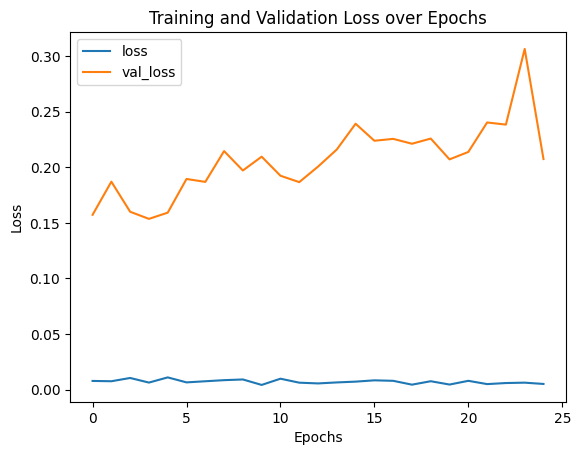

In [43]:
plt.plot(history.history['loss'] )
plt.plot(history.history['val_loss'])
plt.legend(['loss' , 'val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')

plt.show()

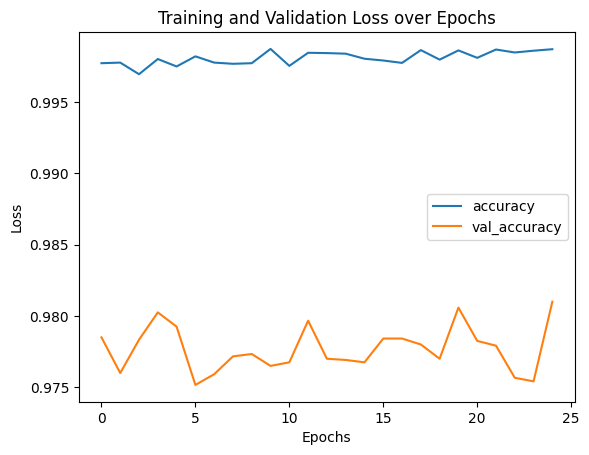

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy' , 'val_accuracy'])

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')

# Show the plot
plt.show()